# Import libraries and read data from csv

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [40]:
business_owners = pd.read_csv('data/char_business_owner.csv')

C:\Users\shane\AppData\Local\Temp\ipykernel_652112\1151820417.py:1: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



# Check shape and dataypes of our data

In [41]:
business_owners.shape

(238188, 16)

In [42]:
business_owners.head(10)

,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_RACE,OWNER_RACE_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_PCT,QDESC_LABEL.1,us
0,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OH1N,Wanted to be my own boss: Not important,2020,409343,11.7,REASONOWN,1
1,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OH1S,Wanted to be my own boss: Somewhat important,2020,844600,24.0,REASONOWN,1
2,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OH1V,Wanted to be my own boss: Very important,2020,2248700,64.0,REASONOWN,1
3,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OI1N,Flexible hours: Not important,2020,611324,17.4,REASONOWN,1
4,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OI1S,Flexible hours: Somewhat important,2020,998422,28.4,REASONOWN,1
5,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OI1V,Flexible hours: Very important,2020,1886208,53.7,REASONOWN,1
6,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OJ1N,Balance work and family: Not important,2020,481868,13.7,REASONOWN,1
7,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OJ1S,Balance work and family: Somewhat important,2020,1007595,28.7,REASONOWN,1
8,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OJ1V,Balance work and family: Very important,2020,2004609,57.1,REASONOWN,1
9,United States,00,Total for all sectors,1,All owners of respondent firms,0,All owners of respondent firms,O10,REASONOWN,OK1N,Greater income: Not important,2020,353955,10.1,REASONOWN,1


In [43]:
business_owners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238188 entries, 0 to 238187
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NAME              238188 non-null  object 
 1   NAICS2017         238188 non-null  object 
 2   NAICS2017_LABEL   238188 non-null  object 
 3   OWNER_SEX         238188 non-null  int64  
 4   OWNER_SEX_LABEL   238188 non-null  object 
 5   OWNER_RACE        238188 non-null  int64  
 6   OWNER_RACE_LABEL  238188 non-null  object 
 7   QDESC             238188 non-null  object 
 8   QDESC_LABEL       238188 non-null  object 
 9   OWNCHAR           238188 non-null  object 
 10  OWNCHAR_LABEL     238188 non-null  object 
 11  YEAR              238188 non-null  int64  
 12  OWNPDEMP          238188 non-null  int64  
 13  OWNPDEMP_PCT      238188 non-null  float64
 14  QDESC_LABEL.1     238188 non-null  object 
 15  us                238188 non-null  int64  
dtypes: float64(1), int64

# Filter 1: Race dataframe
1. Create a subset of the dataframe by filtering OWNER_RACE_LABEL and OWNCHAR_LABEL
2. Remove duplicates
3. Group race dataframe by OWNER_RACE_LABEL AND OWNCHAR_LABEL and take the mean of demographic percent.
4. The grouped data will be multiindexed so we use the unstack() method and droplevel() method to faltten our dataframe.

In [44]:
race = business_owners[['OWNER_RACE_LABEL', 'OWNCHAR_LABEL', 'NAME', 'OWNPDEMP_PCT']]

In [45]:
race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238188 entries, 0 to 238187
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OWNER_RACE_LABEL  238188 non-null  object 
 1   OWNCHAR_LABEL     238188 non-null  object 
 2   NAME              238188 non-null  object 
 3   OWNPDEMP_PCT      238188 non-null  float64
dtypes: float64(1), object(3)
memory usage: 9.1+ MB


In [46]:
race = race[(race['OWNER_RACE_LABEL'] != 'All owners of respondent firms') & (race['OWNER_RACE_LABEL'] != 'Minority') & (race['OWNER_RACE_LABEL'] != 'Nonminority')]

In [47]:
race = race[race['OWNCHAR_LABEL'] != 'Total reporting']

In [48]:
race['OWNER_RACE_LABEL'].value_counts()

White                                         40159
Asian                                         28799
Black or African American                     20684
American Indian and Alaska Native             17507
Native Hawaiian and Other Pacific Islander     9670
Name: OWNER_RACE_LABEL, dtype: int64

In [49]:
race.shape

(116819, 4)

In [50]:
race.drop_duplicates(inplace=True)

In [51]:
race['OWNER_RACE_LABEL'].value_counts()

White                                         12557
Asian                                         11867
Black or African American                      9443
American Indian and Alaska Native              8461
Native Hawaiian and Other Pacific Islander     4363
Name: OWNER_RACE_LABEL, dtype: int64

In [52]:
race['OWNPDEMP_PCT'].max()

200.0

In [53]:
race_filtered = race.groupby(['OWNER_RACE_LABEL','OWNCHAR_LABEL']).mean()

C:\Users\shane\AppData\Local\Temp\ipykernel_652112\1747430129.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [54]:
race_filtered.shape

(185, 1)

In [55]:
race_filtered.describe()

,OWNPDEMP_PCT
count,185.000000
mean,35.941784
std,15.735067
min,0.000000
25%,25.700000
50%,33.403704
75%,45.749286
max,78.583916


In [56]:
race_pivot =race_filtered.unstack().T.droplevel(level=0)

In [57]:
race_pivot.reset_index(inplace=True)

In [58]:
race_pivot.rename(index={'OWNER_RACE_LABEL': 'index'},inplace =True)

In [59]:
race_pivot.columns

Index(['OWNCHAR_LABEL', 'American Indian and Alaska Native', 'Asian',
       'Black or African American',
       'Native Hawaiian and Other Pacific Islander', 'White'],
      dtype='object', name='OWNER_RACE_LABEL')

# Filter 2: Race dataframe
1. We need to create a column for our answer and question to create a treemap. So using the split function to create 2 new columns
2. Create a copy of the dataframe called very_important_answers
3. We with use pandas melt function to label each value.
4. We will have 1 null value and need to drop it using dropna().


In [60]:
race_pivot[['Question', 'Answer']] =race_pivot['OWNCHAR_LABEL'].str.split(':', expand =True)
race_pivot.head()

OWNER_RACE_LABEL,OWNCHAR_LABEL,American Indian and Alaska Native,Asian,Black or African American,Native Hawaiian and Other Pacific Islander,White,Question,Answer
0,Balance work and family: Not important,23.231443,20.289773,19.590863,34.012381,24.782263,Balance work and family,Not important
1,Balance work and family: Somewhat important,31.358403,33.831915,29.983696,29.741803,32.412849,Balance work and family,Somewhat important
2,Balance work and family: Very important,58.491860,55.249614,59.988487,56.182432,49.316307,Balance work and family,Very important
3,Best avenue for ideas: Not important,26.423786,18.628295,20.560476,35.075000,25.458402,Best avenue for ideas,Not important
4,Best avenue for ideas: Somewhat important,34.491915,33.801466,32.008029,29.368182,32.064545,Best avenue for ideas,Somewhat important


In [61]:
race_pivot.drop(['OWNCHAR_LABEL',], axis=1, inplace=True)

In [62]:
race_pivot = race_pivot[['Question','Answer','White','Black or African American','Native Hawaiian and Other Pacific Islander','Asian','American Indian and Alaska Native']]

In [63]:
very_important_answers =race_pivot #[race_pivot['Answer'] == ' Very important']

In [64]:
very_important_answers.head()

OWNER_RACE_LABEL,Question,Answer,White,Black or African American,Native Hawaiian and Other Pacific Islander,Asian,American Indian and Alaska Native
0,Balance work and family,Not important,24.782263,19.590863,34.012381,20.289773,23.231443
1,Balance work and family,Somewhat important,32.412849,29.983696,29.741803,33.831915,31.358403
2,Balance work and family,Very important,49.316307,59.988487,56.182432,55.249614,58.491860
3,Best avenue for ideas,Not important,25.458402,20.560476,35.075000,18.628295,26.423786
4,Best avenue for ideas,Somewhat important,32.064545,32.008029,29.368182,33.801466,34.491915


In [65]:
very_important_answers = pd.melt(very_important_answers,id_vars=['Question','Answer'])

In [66]:
very_important_answers.dropna(inplace=True)
very_important_answers.head()

,Question,Answer,OWNER_RACE_LABEL,value
0,Balance work and family,Not important,White,24.782263
1,Balance work and family,Somewhat important,White,32.412849
2,Balance work and family,Very important,White,49.316307
3,Best avenue for ideas,Not important,White,25.458402
4,Best avenue for ideas,Somewhat important,White,32.064545


In [67]:
import plotly.express as px


In [68]:
fig = px.treemap(very_important_answers, path=[px.Constant("How important is"),'Question','OWNER_RACE_LABEL','Answer'], values='value',
                 color= 'value',
                 color_continuous_scale='RdBu',
                  width=1720,
                 height=1000,)
fig.update_layout(title_text='Most Important Reason to Own A Business', title_x=0.5)
fig.show()

# Filter 3: Gender dataframe
Repeat steps for race dataframe except filter on gender.

In [69]:
gender = business_owners[['OWNER_SEX_LABEL', 'OWNCHAR_LABEL', 'OWNPDEMP_PCT']]

In [70]:
gender.OWNER_SEX_LABEL.value_counts(0)

All owners of respondent firms    84516
Male                              80421
Female                            73251
Name: OWNER_SEX_LABEL, dtype: int64

In [71]:
gender = gender[gender['OWNCHAR_LABEL'] != 'Total reporting']
gender = gender[gender['OWNER_SEX_LABEL'] != 'All owners of respondent firms']

In [72]:
gender.shape

(148830, 3)

In [73]:
gender_group = gender.groupby(['OWNER_SEX_LABEL','OWNCHAR_LABEL']).mean()
gender_group

OWNPDEMP_PCT
OWNER_SEX_LABEL OWNCHAR_LABEL                                             
Female          Balance work and family: Not important           24.932661
                Balance work and family: Somewhat important      30.281828
                Balance work and family: Very important          60.317778
                Best avenue for ideas: Not important             29.021064
                Best avenue for ideas: Somewhat important        34.790087
...                                                                    ...
Male            Wanted to be my own boss: Somewhat important     28.607759
                Wanted to be my own boss: Very important         67.963127
                Work for self: Not important                     33.642451
                Work for self: Somewhat important                38.831072
                Work for self: Very important                    39.221477

[74 rows x 1 columns]

In [74]:
gender_group_pivot = gender_group.unstack().T.droplevel(level=0)
gender_group_pivot.reset_index(inplace=True)
gender_group_pivot.head()

OWNER_SEX_LABEL,OWNCHAR_LABEL,Female,Male
0,Balance work and family: Not important,24.932661,19.265779
1,Balance work and family: Somewhat important,30.281828,35.348822
2,Balance work and family: Very important,60.317778,56.407584
3,Best avenue for ideas: Not important,29.021064,15.857672
4,Best avenue for ideas: Somewhat important,34.790087,32.610798


In [75]:
gender_group_pivot[['Question', 'Answer']] =gender_group_pivot['OWNCHAR_LABEL'].str.split(':', expand =True)

In [76]:
gender_group_pivot.head()

OWNER_SEX_LABEL,OWNCHAR_LABEL,Female,Male,Question,Answer
0,Balance work and family: Not important,24.932661,19.265779,Balance work and family,Not important
1,Balance work and family: Somewhat important,30.281828,35.348822,Balance work and family,Somewhat important
2,Balance work and family: Very important,60.317778,56.407584,Balance work and family,Very important
3,Best avenue for ideas: Not important,29.021064,15.857672,Best avenue for ideas,Not important
4,Best avenue for ideas: Somewhat important,34.790087,32.610798,Best avenue for ideas,Somewhat important


In [77]:
gender_group_pivot.drop(['OWNCHAR_LABEL', ], axis=1, inplace=True)

In [78]:
very_important_answers_gender = gender_group_pivot[gender_group_pivot['Answer'] == ' Very important']

In [79]:
very_important_answers_gender = pd.melt(very_important_answers_gender,id_vars=['Question','Answer'])

In [80]:
very_important_answers_gender.head()

,Question,Answer,OWNER_SEX_LABEL,value
0,Balance work and family,Very important,Female,60.317778
1,Best avenue for ideas,Very important,Female,51.957325
2,Carry on family business,Very important,Female,28.073248
3,Couldn't find a job,Very important,Female,11.464938
4,Flexible hours,Very important,Female,56.849436


In [81]:
fig = px.bar(very_important_answers_gender, x ='Question', y='value', color='OWNER_SEX_LABEL',
             labels={"value":"Number of respondents",
                     "OWNER_SEX_LABEL":"Gender"},
             title='Most Important to Own a Business by Gender',

             )
fig.update_layout( title_x=0.5)
fig.show()

In [82]:
business_owners['NAICS2017_LABEL'].value_counts()

Professional, scientific, and technical services                1822
Management of companies and enterprises                         1737
Educational services                                            1694
Wholesale electronic markets and agents and brokers             1648
Printing and related support activities                         1628
                                                                ... 
General medical and surgical hospitals                           149
Forest nurseries and gathering of forest products                135
Specialty (except psychiatric and substance abuse) hospitals      96
Pipeline transportation                                            6
Pipeline transportation of natural gas                             6
Name: NAICS2017_LABEL, Length: 362, dtype: int64

# Filter 4: Own Boss dataframe
For this dataframe we want to find out what industry are people working in that answer very important to "wanted to be my own boss"
1. We create a dataframe with OWN_CHAR_LABEL AND NAICS2017_label
2. Filter using the following
```own_boss = own_boss[(own_boss['Question'] == 'Wanted to be my own boss') & (own_boss['Answer'] == ' Very important')]```
3. Finally, take the 10 largest values using nlargets with parameters n= 10 and columns ='Answer'

In [83]:
own_boss = business_owners[['OWNCHAR_LABEL', 'NAICS2017_LABEL', ]]

In [96]:
own_boss.head()

,Sector,Total
0,Management of companies and enterprises,51
1,Printing and related support activities,48
2,Wholesale electronic markets and agents and br...,48
3,Educational services,48
4,Other information services,48


In [85]:
pd.options.display.max_rows = 999
own_boss['NAICS2017_LABEL'].value_counts()

Professional, scientific, and technical services                                                               1822
Management of companies and enterprises                                                                        1737
Educational services                                                                                           1694
Wholesale electronic markets and agents and brokers                                                            1648
Printing and related support activities                                                                        1628
Other information services                                                                                     1584
Data processing, hosting, and related services                                                                 1552
Gasoline stations                                                                                              1516
Support activities for mining                                           

In [86]:
own_boss = own_boss[own_boss['NAICS2017_LABEL'] != 'Total for all sectors']
own_boss[['Question', 'Answer']] =own_boss['OWNCHAR_LABEL'].str.split(':', expand =True)

C:\Users\shane\AppData\Local\Temp\ipykernel_652112\967876002.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shane\AppData\Local\Temp\ipykernel_652112\967876002.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
own_boss = own_boss[(own_boss['Question'] == 'Wanted to be my own boss') & (own_boss['Answer'] == ' Very important')]

In [88]:
own_boss['NAICS2017_LABEL'].value_counts()

Management of companies and enterprises                                                                        51
Professional, scientific, and technical services                                                               48
Printing and related support activities                                                                        48
Other information services                                                                                     48
Data processing, hosting, and related services                                                                 48
Educational services                                                                                           48
Wholesale electronic markets and agents and brokers                                                            48
Gasoline stations                                                                                              42
Support activities for mining                                                           

In [89]:
own_boss.shape

(6967, 4)

In [90]:
own_boss.drop(columns='OWNCHAR_LABEL', inplace=True)

In [91]:
# own_boss.groupby('NAICS2017_LABEL').mean().sort_values('OWNPDEMP_PCT')

In [92]:
own_boss =own_boss.groupby('NAICS2017_LABEL').count().sort_values('Answer', ascending=False)

In [93]:
own_boss = own_boss.nlargest(10, columns='Answer')

In [94]:
own_boss = own_boss.unstack().reset_index()
own_boss.drop('level_0',inplace=True, axis=1)
own_boss.rename(columns={"NAICS2017_LABEL": "Sector", 0: "Total"}, inplace=True)

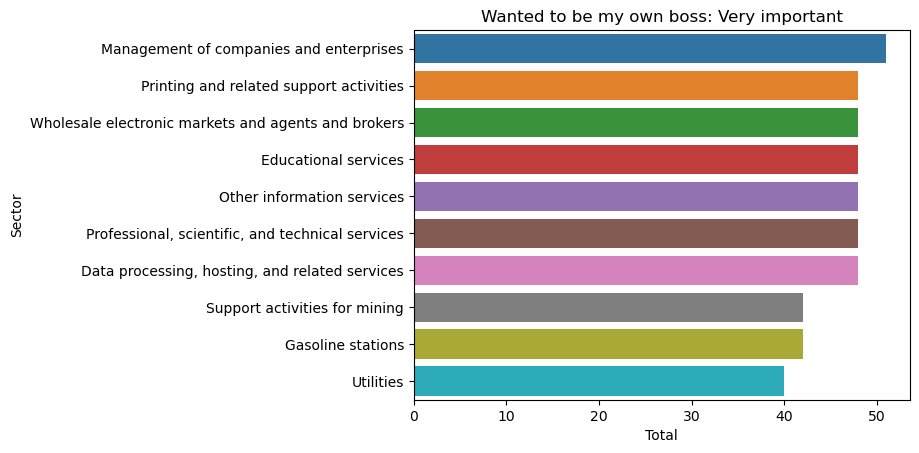

In [95]:
top_10 = sns.barplot(x='Total', y='Sector', data=own_boss)
plt.title('Wanted to be my own boss: Very important')
plt.show()